# Try This Exercise

In this exercise, you again get to work on my data.  

The file `oiii_linmix_test.dat` contains the following columns:
1.  The "eigenvector 1" parameter.  Call that $x1$.
2. The error on eigenvector 1.
3. The log of the radius of the outflow.  Call that $x2$.
4. The error on the log of the radius.
5. The detection flag for log of the radius.  A `0` means that the value is a lower limit.
6. $\log [OIII]_{obs}-\log[OIII]_{pred}$.  Call that $y$.
7. The error on $y$.

## Part 1

- Perform an OLS analysis on $x1$ versus $y$.  Use a Monte Carlo scheme to sample the errors.
- Repeat the analysis using `linmix`.  Plot the data plus errors and the regression bow ties for both OLS and `linmix`.  Discuss.


### $\textit{Answer:}$
We'll start by reading in the data:

In [25]:
# Standard python initilization 

%pylab inline
import numpy as np
fontsize = 8
figsize = (3,3)
dpi = 220
# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize, 'figure.dpi': dpi})

# Default tick label size
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 1

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['flag', 'beta', 'figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# read in relevant data
# call second data set 'x2_r' since 'x2' already defined below
x1, x1_err, x2_r, x2_r_err, flag, y, y_err = np.loadtxt('oiii_linmix_test.dat', unpack = True, skiprows = 1)

In [3]:
# load the OLS
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

# Prepare data by adding row of constants
x1_const = add_constant(x1)
print(x1_const)


[[ 1.         -1.1765466 ]
 [ 1.          0.91524111]
 [ 1.          1.1349706 ]
 [ 1.          0.97232938]
 [ 1.          0.44109855]
 [ 1.         -1.7521082 ]
 [ 1.          1.6525106 ]
 [ 1.          0.90474646]
 [ 1.          1.4858743 ]
 [ 1.         -1.5220302 ]
 [ 1.          1.4636049 ]
 [ 1.         -0.08560144]
 [ 1.         -0.76852739]
 [ 1.         -1.6387285 ]
 [ 1.         -1.8186766 ]
 [ 1.          1.4748312 ]
 [ 1.          1.6852077 ]
 [ 1.         -1.9473102 ]
 [ 1.         -1.1409749 ]
 [ 1.         -1.1354831 ]
 [ 1.          1.8055989 ]
 [ 1.         -1.0348564 ]
 [ 1.          0.24636771]
 [ 1.          2.1784447 ]
 [ 1.         -0.32145442]
 [ 1.          0.6957067 ]
 [ 1.         -0.67920071]
 [ 1.         -0.12000378]
 [ 1.         -1.6321048 ]
 [ 1.         -0.06707455]]


In [4]:
# Try fitting 
results=OLS(y,x1_const).fit()

print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     20.61
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           9.75e-05
Time:                        18:34:32   Log-Likelihood:                -24.245
No. Observations:                  30   AIC:                             52.49
Df Residuals:                      28   BIC:                             55.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0042      0.103     -9.787      0.0

In [5]:
print(x1[0])
print(x1_err[0])

-1.1765466
0.30055736


In [6]:
# Simulate for a bunch of times
numpnts = len(x1)
num_sim = 1000

sigmax=x1.std()
sigmay = y.std()



params_1_out=np.zeros([2,num_sim])

for i in range(num_sim):
    x1_test= x1+0.5*sigmax*np.random.normal(np.mean(x1_err),x1_err.std(),numpnts)
    y_test= y+0.5*sigmay*np.random.normal(np.mean(y_err),y_err.std(),numpnts)
    
    x1_const=add_constant(x1_test)
    results1=OLS(y_test,x1_const).fit()
    params_1_out[:,i]=results1.params[:]

In [7]:
#confidence interverals

xplot=np.linspace(min(x1),max(x1),1001)
print (xplot.shape)

percent_regions=[1.0-0.9973,1.0-0.9545,1.0-0.6827,0.5,0.6827,0.9545,0.9973]

confidence_regions_1=np.zeros([7,1001])

# Instead of the markov chain used by linmix, use output from simulations above
numsamples=num_sim
temp2=np.zeros(num_sim)
f2=np.array(range(numsamples))/float(numsamples)


for i in range(1001):
    for j in range(numsamples):
        #params[0,j]: y-int; params[1,j]: slope
        temp2[j]=params_1_out[0,j] +xplot[i]*params_1_out[1,j]
    x2=np.sort(temp2)
    confidence_regions_1[0:7,i]=np.interp(percent_regions,f2,x2)

(1001,)


In [8]:
# Repeat analysis for linmix
# Run linmix (this cell is iffy if linmix is 'import linmix' is reloaded')
import linmix

lm1 = linmix.LinMix(x1, y, x1_err, y_err, K=5)
lm1.run_mcmc(silent=True)

In [9]:
# Extract confidence regions
xplot=np.linspace(min(x1),max(x1),1001)
print (xplot.shape)

percent_regions=[1.0-0.9973,1.0-0.9545,1.0-0.6827,0.5,0.6827,0.9545,0.9973]

confidence_regions_2=np.zeros([7,1001])

numsamples=len(lm1.chain)
temp2=np.zeros(numsamples)
f2=np.array(range(numsamples))/float(numsamples)

for i in range(1001):
    for j in range(numsamples):
        temp2[j]=lm1.chain[j]['alpha']+xplot[i]*lm1.chain[j]['beta']
    x2=np.sort(temp2)
    confidence_regions_2[0:7,i]=np.interp(percent_regions,f2,x2)

(1001,)


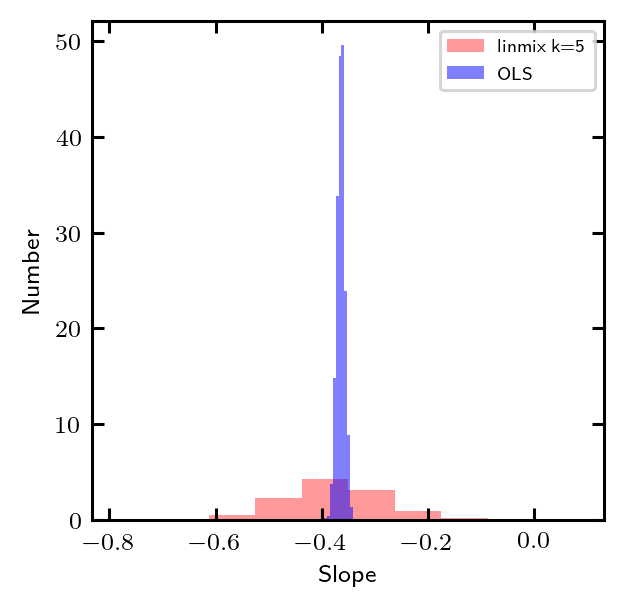

In [26]:
# Compare

# Linmix:
alpha=lm1.chain[['alpha']]
beta=lm1.chain[['beta']].astype(np.float)
linmix_hist_1=plt.hist(beta, histtype='stepfilled',linewidth=1,density=True,label='linmix k=5', color = 'red', alpha = 0.4)

# OLS:
ols_1_hist=plt.hist(params_1_out[1,:],histtype='stepfilled',linewidth=1,density=True, label = 'OLS', color = 'blue', alpha = 0.5)

plt.xlabel('Slope')
plt.ylabel('Number')
plt.legend(fontsize = 6)

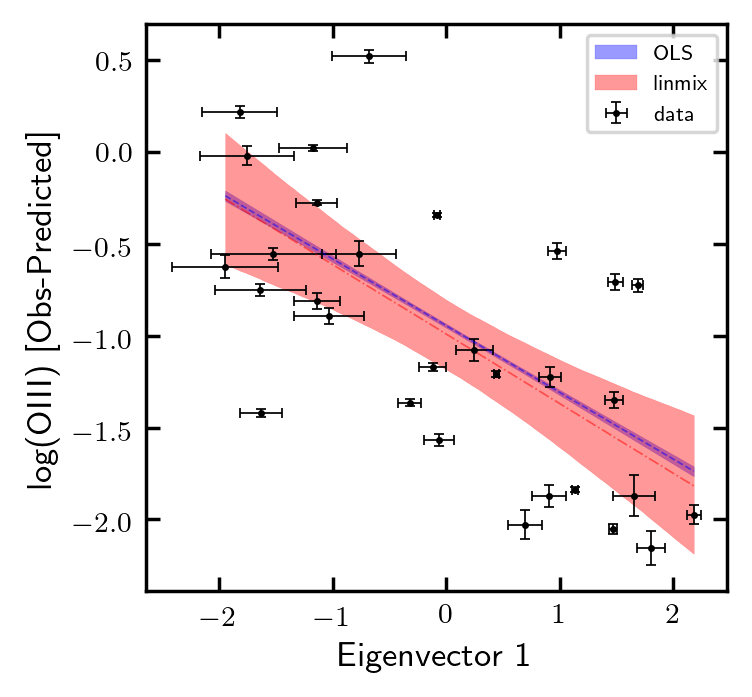

In [11]:
# Plot
plt.figure(figsize = [3,3], dpi = 250)

# Confidence interval of OLS
plt.fill_between(xplot,confidence_regions_1[1,:], confidence_regions_1[5,:], color = 'blue', alpha = 0.4, linewidth = 0.1, label = 'OLS')
plt.plot(xplot,confidence_regions_1[3,:], color = 'blue', alpha = 0.5, linestyle = '--', linewidth = 0.5)


# Confidence interval of linmax
plt.fill_between(xplot,confidence_regions_2[1,:], confidence_regions_2[5,:], color = 'red', alpha = 0.4, linewidth = 0.1, label = 'linmix')
plt.plot(xplot,confidence_regions_2[3,:], color = 'red', alpha = 0.5, linestyle = '-.', linewidth = 0.5)


# Data
plt.errorbar(x1,y, yerr = y_err, xerr = x1_err, fmt = 'k.', label = 'data', capsize = 1.5, mew =0.5, linewidth = 0.5, ms = 3)

plt.xlabel('Eigenvector 1')
plt.ylabel('log(OIII) [Obs-Predicted]')
plt.legend(fontsize = 6)

From the above plot, we can make a few observations:
 - The confidence intervals for OLS are significantly tighter than they are from linmix (i.e, the OLS confidence regions completely overlap with those from linmix)
 - The magnitude of the best fit slope seems slightly higher from OLS vs linmix. This is evident both by comparing the middle confidence interval (the dashed and dot-dashed lines) in the above plot and by the means in the above histograms.

_____________________________________
______________________________________

## Part 2

- Repeat the analysis above using $x2$ as the independent variable.  Make suitable plots and discuss.
- Then, repeat with the reduced data set that uses only the detections.  Discuss. 

In [12]:
# Repeat above analysis

# OLS
# Prepare data by adding row of constants
x2_const = add_constant(x2_r)
len((x2_const))

30

In [13]:
# Try fitting 
results=OLS(y,x2_const).fit()

print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     4.075
Date:                Mon, 09 Nov 2020   Prob (F-statistic):             0.0532
Time:                        18:36:25   Log-Likelihood:                -30.482
No. Observations:                  30   AIC:                             64.96
Df Residuals:                      28   BIC:                             67.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5833      0.245     -2.382      0.0

In [14]:
# Simulate for a bunch of times
numpnts = len(x2_r)
num_sim = 1000

sigmax=x2_r.std()
sigmay = y.std()



params_2_out=np.zeros([2,num_sim])

for i in range(num_sim):
    x2_test= x2_r+0.5*sigmax*np.random.normal(np.mean(x2_r_err),x2_r_err.std(),numpnts)
    y2_test= y+0.5*sigmay*np.random.normal(np.mean(y_err),y_err.std(),numpnts)
    
    x2_const=add_constant(x2_test)
    results2=OLS(y2_test,x2_const).fit()
    params_2_out[:,i]=results2.params[:]
    
    
    
#confidence interverals

xplot=np.linspace(min(x2_r),max(x2_r),1001)
print (xplot.shape)

percent_regions=[1.0-0.9973,1.0-0.9545,1.0-0.6827,0.5,0.6827,0.9545,0.9973]

confidence_regions_3=np.zeros([7,1001])

# Instead of the markov chain used by linmix, use simulations from above
numsamples=num_sim
temp2=np.zeros(num_sim)
f2=np.array(range(numsamples))/float(numsamples)


for i in range(1001):
    for j in range(numsamples):
        #params[0,j]: y-int; params[1,j]: slope
        temp2[j]=params_2_out[0,j] +xplot[i]*params_2_out[1,j]
    x2=np.sort(temp2)
    confidence_regions_3[0:7,i]=np.interp(percent_regions,f2,x2)



(1001,)


In [15]:
# Repeat analysis for linmix


lm2 = linmix.LinMix(x2_r, y, x2_r_err, y_err, K=5)
lm2.run_mcmc(silent=True)

In [16]:
# Extract confidence regions
xplot=np.linspace(min(x2_r),max(x2_r),1001)
print (xplot.shape)

percent_regions=[1.0-0.9973,1.0-0.9545,1.0-0.6827,0.5,0.6827,0.9545,0.9973]

confidence_regions_4=np.zeros([7,1001])

numsamples=len(lm2.chain)
temp2=np.zeros(numsamples)
f2=np.array(range(numsamples))/float(numsamples)

for i in range(1001):
    for j in range(numsamples):
        temp2[j]=lm2.chain[j]['alpha']+xplot[i]*lm2.chain[j]['beta']
    x2=np.sort(temp2)
    confidence_regions_4[0:7,i]=np.interp(percent_regions,f2,x2)

(1001,)


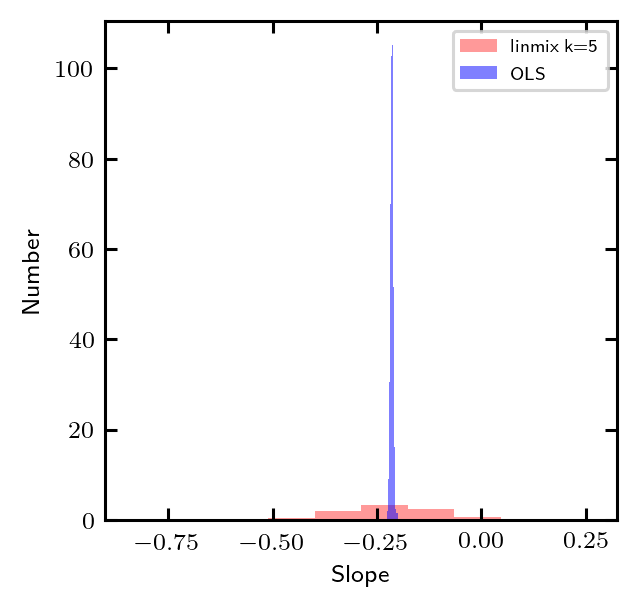

In [27]:
# Compare

# Linmix:
alpha=lm2.chain[['alpha']]
beta=lm2.chain[['beta']].astype(np.float)
linmix_hist_2=plt.hist(beta, histtype='stepfilled',linewidth=1,density=True,label='linmix k=5', color = 'red', alpha = 0.4)

# OLS:
ols_2_hist=plt.hist(params_2_out[1,:],histtype='stepfilled',linewidth=1,density=True, label = 'OLS', color = 'blue', alpha = 0.5)

plt.xlabel('Slope')
plt.ylabel('Number')
plt.legend(fontsize = 6)

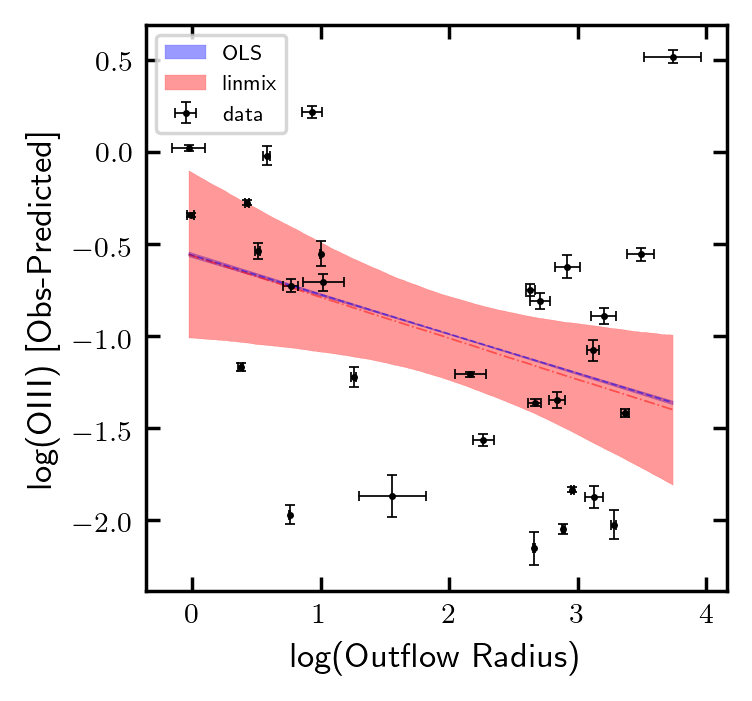

In [18]:
# Plot

plt.figure(figsize = [3,3], dpi = 250)

# Confidence interval of OLS
plt.fill_between(xplot,confidence_regions_3[1,:], confidence_regions_3[5,:], color = 'blue', alpha = 0.4, linewidth = 0.1, label = 'OLS')
plt.plot(xplot,confidence_regions_3[3,:], color = 'blue', alpha = 0.5, linestyle = '--', linewidth = 0.5)


# Confidence interval of linmax
plt.fill_between(xplot,confidence_regions_4[1,:], confidence_regions_4[5,:], color = 'red', alpha = 0.4, linewidth = 0.1, label = 'linmix')
plt.plot(xplot,confidence_regions_4[3,:], color = 'red', alpha = 0.5, linestyle = '-.', linewidth = 0.5)


# Data
plt.errorbar(x2_r,y, yerr = y_err, xerr = x2_r_err, fmt = 'k.', label = 'data', capsize = 1.5, mew =0.5, linewidth = 0.5, ms = 3)

plt.xlabel('log(Outflow Radius)')
plt.ylabel('log(OIII) [Obs-Predicted]')
plt.legend(fontsize = 6)

Again, this gives us a very narrow confidence region for the OLS method with a slightly different slope from the linmix procedure.

In [19]:
# Select flagged data
here = np.where(flag == 1)

x2_reduced = x2_r[here]
x2_err_reduced = x2_r_err[here]

y_reduced = y[here]
y_err_reduced = y_err[here]

In [20]:
# Repeat analysis: OLS

x2_const = add_constant(x2_reduced)

# Try fitting 
results=OLS(y_reduced,x2_const).fit()


print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     12.37
Date:                Mon, 09 Nov 2020   Prob (F-statistic):            0.00246
Time:                        18:38:18   Log-Likelihood:                -15.523
No. Observations:                  20   AIC:                             35.05
Df Residuals:                      18   BIC:                             37.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3845      0.207     -1.859      0.0

In [21]:
# Simulate for a bunch of times
numpnts = len(x2_reduced)
num_sim = 1000

sigmax=x2_reduced.std()
sigmay = y_reduced.std()



params_3_out=np.zeros([2,num_sim])

for i in range(num_sim):
    x3_test= x2_reduced+0.5*sigmax*np.random.normal(np.mean(x2_err_reduced),x2_err_reduced.std(),numpnts)
    y3_test= y_reduced+0.5*sigmay*np.random.normal(np.mean(y_err_reduced),y_err_reduced.std(),numpnts)
    
    x3_const=add_constant(x3_test)
    results3=OLS(y3_test,x3_const).fit()
    params_3_out[:,i]=results3.params[:]
    
    
    
#confidence interverals

xplot_2=np.linspace(min(x2_reduced),max(x2_reduced),1001)

percent_regions=[1.0-0.9973,1.0-0.9545,1.0-0.6827,0.5,0.6827,0.9545,0.9973]

confidence_regions_5=np.zeros([7,1001])

# Instead of the markov chain used by linmix, use simulations from above
numsamples=num_sim
temp2=np.zeros(num_sim)
f2=np.array(range(numsamples))/float(numsamples)


for i in range(1001):
    for j in range(numsamples):
        #params[0,j]: y-int; params[1,j]: slope
        temp2[j]=params_3_out[0,j] +xplot_2[i]*params_3_out[1,j]
    x2=np.sort(temp2)
    confidence_regions_5[0:7,i]=np.interp(percent_regions,f2,x2)



In [22]:
# Repeat analysis for linmix

lm3 = linmix.LinMix(x2_reduced, y_reduced, x2_err_reduced, y_err_reduced, K=5)
lm3.run_mcmc(silent=True)


# Extract confidence regions
xplot_2=np.linspace(min(x2_reduced),max(x2_reduced),1001)


percent_regions=[1.0-0.9973,1.0-0.9545,1.0-0.6827,0.5,0.6827,0.9545,0.9973]

confidence_regions_6=np.zeros([7,1001])

numsamples=len(lm3.chain)
temp2=np.zeros(numsamples)
f2=np.array(range(numsamples))/float(numsamples)

for i in range(1001):
    for j in range(numsamples):
        temp2[j]=lm3.chain[j]['alpha']+xplot_2[i]*lm3.chain[j]['beta']
    x2=np.sort(temp2)
    confidence_regions_6[0:7,i]=np.interp(percent_regions,f2,x2)

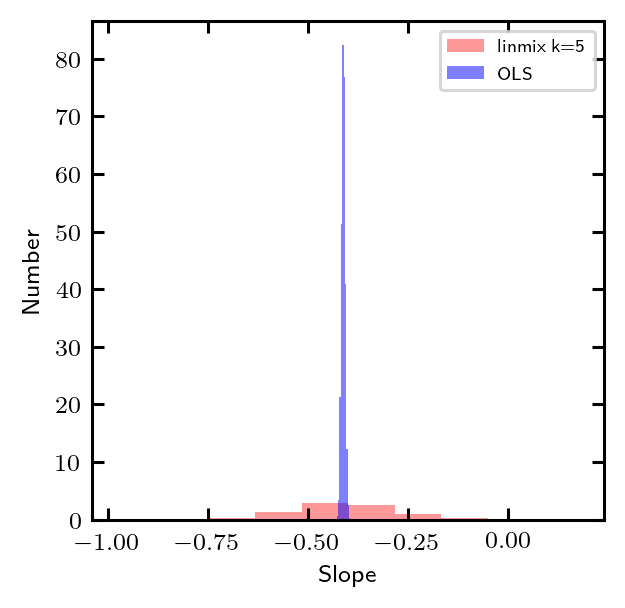

In [28]:
# Compare

# Linmix:
alpha=lm3.chain[['alpha']]
beta=lm3.chain[['beta']].astype(np.float)
linmix_hist_3=plt.hist(beta, histtype='stepfilled',linewidth=1,density=True,label='linmix k=5', color = 'red', alpha = 0.4)

# OLS:
ols_3_hist=plt.hist(params_3_out[1,:],histtype='stepfilled',linewidth=1,density=True, label = 'OLS', color = 'blue', alpha = 0.5)

plt.xlabel('Slope')
plt.ylabel('Number')
plt.legend(fontsize = 6)

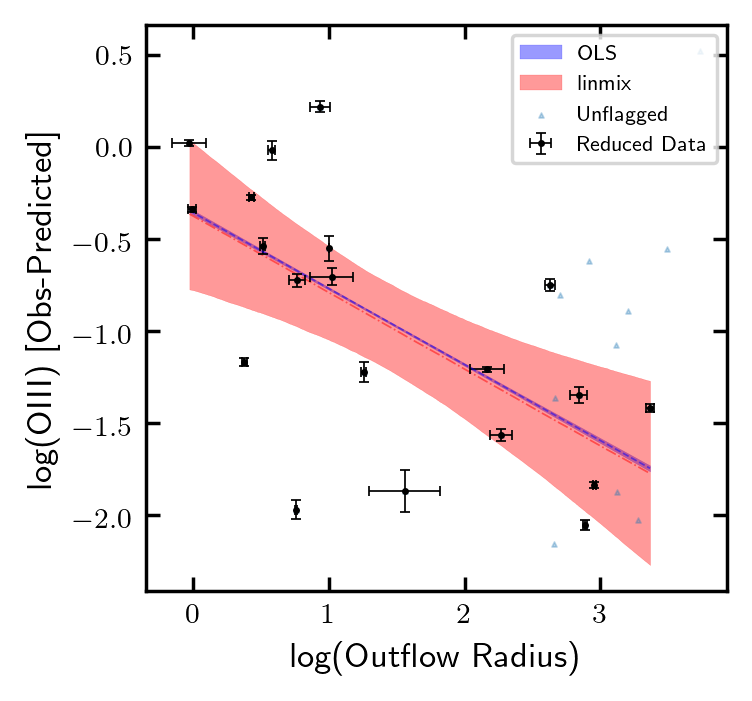

In [24]:
# Plot
plt.figure(figsize = [3,3], dpi = 250)

# Confidence interval of OLS
plt.fill_between(xplot_2,confidence_regions_5[1,:], confidence_regions_5[5,:], color = 'blue', alpha = 0.4, linewidth = 0.1, label = 'OLS')
plt.plot(xplot_2,confidence_regions_5[3,:], color = 'blue', alpha = 0.5, linestyle = '--', linewidth = 0.5)


# Confidence interval of linmax
plt.fill_between(xplot_2,confidence_regions_6[1,:], confidence_regions_6[5,:], color = 'red', alpha = 0.4, linewidth = 0.1, label = 'linmix')
plt.plot(xplot_2,confidence_regions_6[3,:], color = 'red', alpha = 0.5, linestyle = '-.', linewidth = 0.5)


# Data
plt.errorbar(x2_reduced,y_reduced, yerr = y_err_reduced, xerr = x2_err_reduced, fmt = 'k.', label = 'Reduced Data', capsize = 1.5, mew =0.5, linewidth = 0.5, ms = 3)
plt.scatter(x2_r,y, alpha = 0.3, label = 'Unflagged', s = 2, marker = '^', linewidth = 0.5)
plt.xlabel('log(Outflow Radius)')
plt.ylabel('log(OIII) [Obs-Predicted]')
plt.legend(fontsize = 6)


As evident from the histograms, the reduced data set tends toward higher values of the slope for both the OLS and linmix result. We visualize this by plotting th middle confidence interval ( the dot dashed lines in the above bowtie plot) for both the flagged and complete data set:

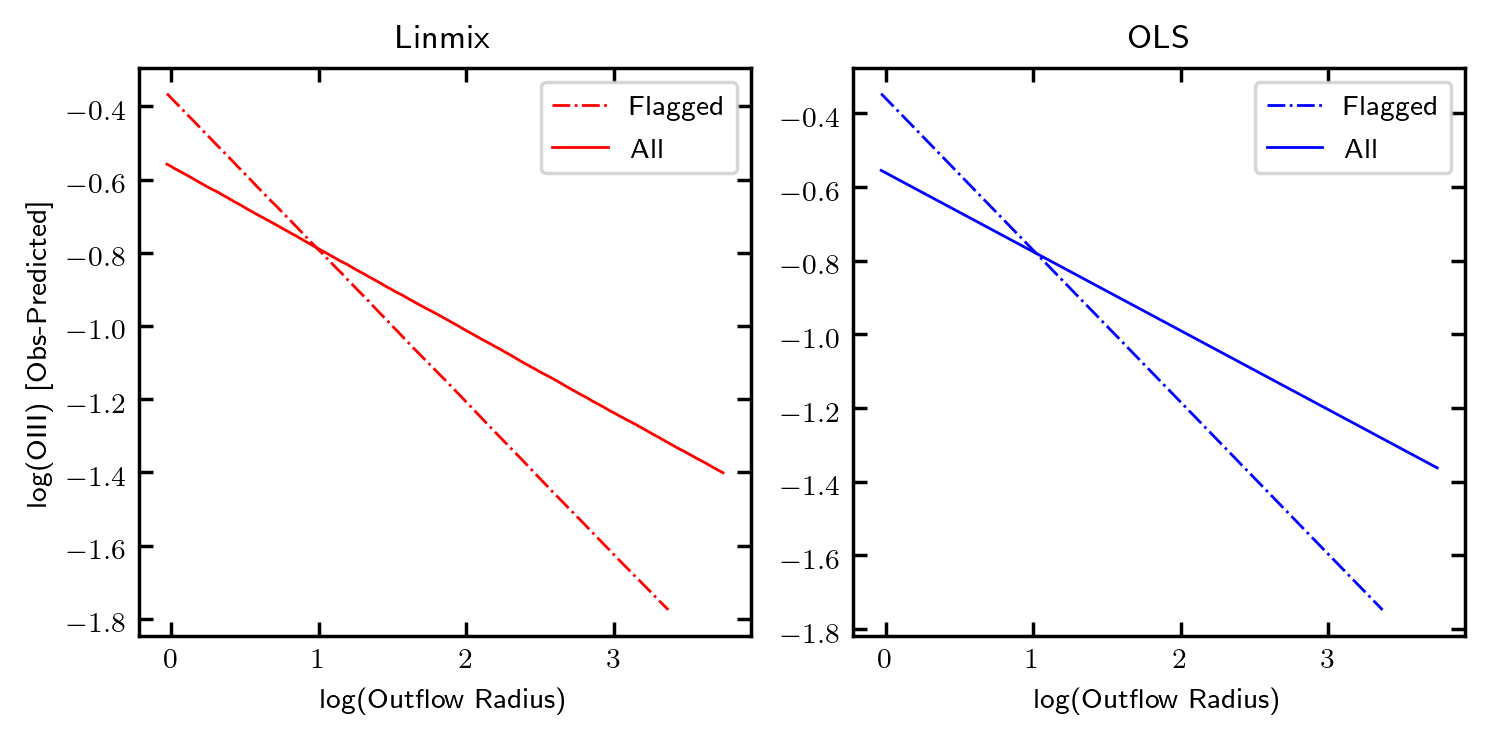

In [55]:
# Compare slopes 
# Plot
plt.figure(figsize = [6,3], dpi = 250)


# Linmix
plt.subplot(121)
plt.plot(xplot_2,confidence_regions_6[3,:], color = 'red', linestyle = '-.', linewidth = 0.8, label = 'Flagged')
plt.plot(xplot,confidence_regions_4[3,:], color = 'red' ,linewidth = 0.8, label = 'All')

plt.title('Linmix')
plt.xlabel('log(Outflow Radius)')
plt.ylabel('log(OIII) [Obs-Predicted]')
plt.legend()



# OLS
plt.subplot(122)
plt.plot(xplot_2,confidence_regions_5[3,:], color = 'blue', linestyle = '-.', linewidth = 0.8, label = 'Flagged')

plt.plot(xplot,confidence_regions_3[3,:], color = 'blue',  linewidth = 0.8, label = 'All')


plt.tight_layout()
plt.title('OLS')
plt.xlabel('log(Outflow Radius)')

plt.legend()


So it looks like the magnitude of the slopes are higher for both linmix and OLS for the flagged data. We can conclude that the relationship between OIII flux excess and outflow radius is steeper for sources with the detection flag.